# Evaluate Model Performance

In this notebook, we will evaluate the performance of our trained Artificial Neural Network (ANN) model using various metrics such as accuracy, precision, recall, F1 score, and visualizations like confusion matrix, ROC curve, and precision-recall curve. This evaluation will help us understand how well our model is predicting customer churn.


## Load Configuration and Libraries

We begin by loading the necessary libraries and configuration settings. This step is crucial to ensure that the paths and parameters used in the evaluation process are correctly defined.


In [5]:
import os
import json
import pandas as pd # type: ignore
from tensorflow.keras.models import load_model # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve # type: ignore

# Load configuration
config_path = os.path.join(os.path.dirname(os.path.abspath('')), '..', 'config.json')
print(f"Config path: {config_path}")
with open(config_path, 'r') as f:
    config = json.load(f)

# Print the loaded paths for debugging
print(f"Loaded paths from config: {config}")


Config path: d:\Customer-Churn-Analysis\notebooks\..\config.json
Loaded paths from config: {'raw_data_path': 'data/raw/Dataset (ATS)-1.csv', 'interim_cleaned_data_path': 'data/interim/cleaned_dataset.csv', 'preprocessed_data_path': 'Data_Preparation/preprocessed_dataset/cleaned_dataset.csv', 'processed_data_path': 'data/processed/processed_dataset_with_features.csv', 'train_data_path': 'data/train/train_dataset.csv', 'test_data_path': 'data/test/test_dataset.csv', 'min_max_scaled_path': 'Data_Preparation/scaling_techniques/min_max_scaled_dataset.csv', 'standard_scaled_path': 'Data_Preparation/scaling_techniques/standard_scaled_dataset.csv', 'training_set_path': 'Data_Preparation/training_sets/train_dataset.csv', 'testing_set_path': 'Data_Preparation/testing_sets/test_dataset.csv', 'min-max_scaled_4_clusters_path': 'Clustering_Analysis/kmeans_model/min-max_scaled_4_clusters.csv', 'standard_scaled_4_clusters_path': 'Clustering_Analysis/kmeans_model/standard_scaled_4_clusters.csv', 'min-m

## Define Paths and Load Data

Next, we define the paths for our data and model based on the configuration file and load the test dataset.


In [6]:
# Define paths using absolute paths from the configuration file
base_dir = os.path.dirname(os.path.dirname(os.path.abspath('')))  # Get the project root directory
test_data_path = os.path.join(base_dir, config['test_data_path'])
trained_model_path = os.path.join(base_dir, config['trained_model_path'])
results_path = os.path.join(base_dir, config['results_path'])
visualization_path = os.path.join(base_dir, config['visualization_path'])

# Define the evaluation path within the visualization folder
evaluation_path = os.path.join(visualization_path, 'evaluation')

# Ensure the evaluation directory exists
os.makedirs(evaluation_path, exist_ok=True)

# Correctly load the test data using the path from the configuration
try:
    test_data = pd.read_csv(test_data_path)
    print(f"Test data loaded successfully from: {test_data_path}")
except FileNotFoundError as e:
    print(f"Error: Test data file not found at {test_data_path}")
    raise e

# Separate features (X) and target (y)
X_test = test_data.drop(columns=['Churn_No', 'Churn_Yes'])
y_test = test_data['Churn_Yes']


Test data loaded successfully from: d:\Customer-Churn-Analysis\data/test/test_dataset.csv


## Load Trained Model

Next, we load the trained ANN model that was saved earlier. This model will be used to make predictions on the test data.


In [7]:
# Load the trained model
model = load_model(os.path.join(trained_model_path, 'best_model.h5'))

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Predictions have been made on the test data.")


45/45 [==============================] - 0s 1ms/step
Predictions have been made on the test data.


## Evaluate Model Performance

We evaluate the model's performance using metrics such as accuracy, precision, recall, F1 score, and also generate visualizations like the confusion matrix, ROC curve, and precision-recall curve.


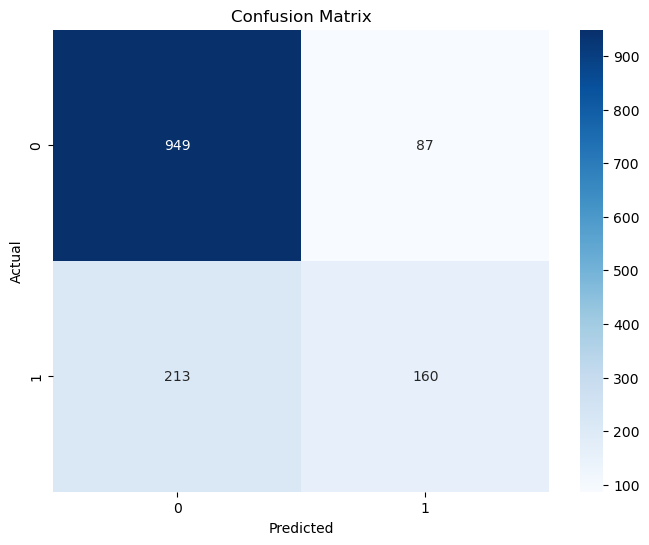

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.86      1036
         1.0       0.65      0.43      0.52       373

    accuracy                           0.79      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409



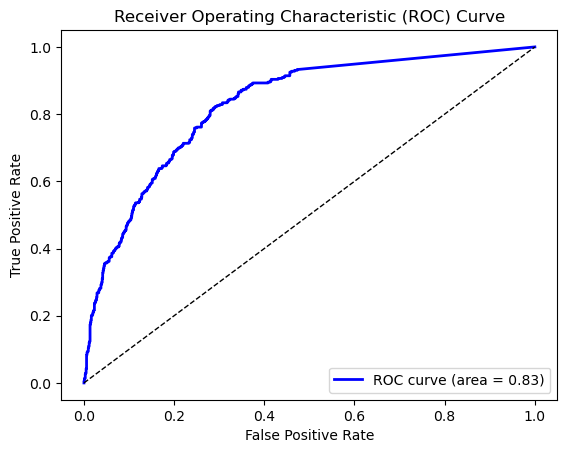

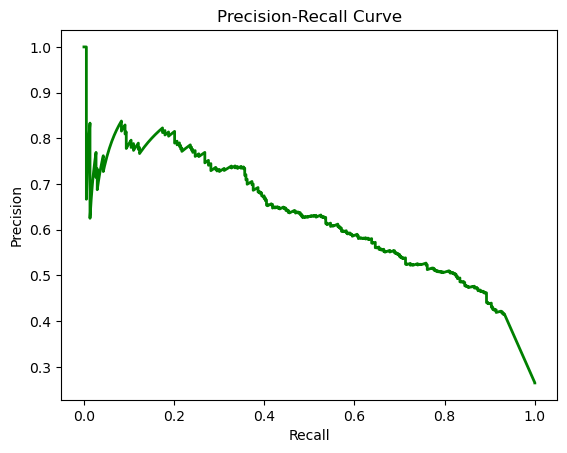

In [8]:
# Generate and save confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(visualization_path, 'confusion_matrix.png'))  # Corrected path
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

with open(os.path.join(results_path, 'classification_report.txt'), 'w') as f:
    f.write(class_report)

# Generate and save ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig(os.path.join(visualization_path, 'roc_curve.png'))  # Corrected path
plt.show()

# Generate and save Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig(os.path.join(visualization_path, 'precision_recall_curve.png'))  # Corrected path
plt.show()


## Summary

The model evaluation provides insights into the performance of our ANN model in predicting customer churn. The confusion matrix helps identify the true positives, false positives, true negatives, and false negatives. The ROC curve and Precision-Recall curve offer visual understanding of the trade-offs between sensitivity and specificity, and the balance between precision and recall, respectively. This comprehensive evaluation ensures that the model is robust and provides reliable predictions.
